In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('train.csv', parse_dates=['Date'])
store_data = pd.read_csv('store.csv')


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_24880\4273443541.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv', parse_dates=['Date'])


In [3]:
data = pd.merge(data, store_data, on='Store', how='left')


In [4]:
data.fillna(0, inplace=True)  # Fill missing values with 0


In [5]:
# Extract date features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek


In [6]:
# Convert StateHoliday to numerical
data['StateHoliday'] = data['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})


In [7]:
data = data[(data['Open'] == 1) & (data['Sales'] > 0)]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


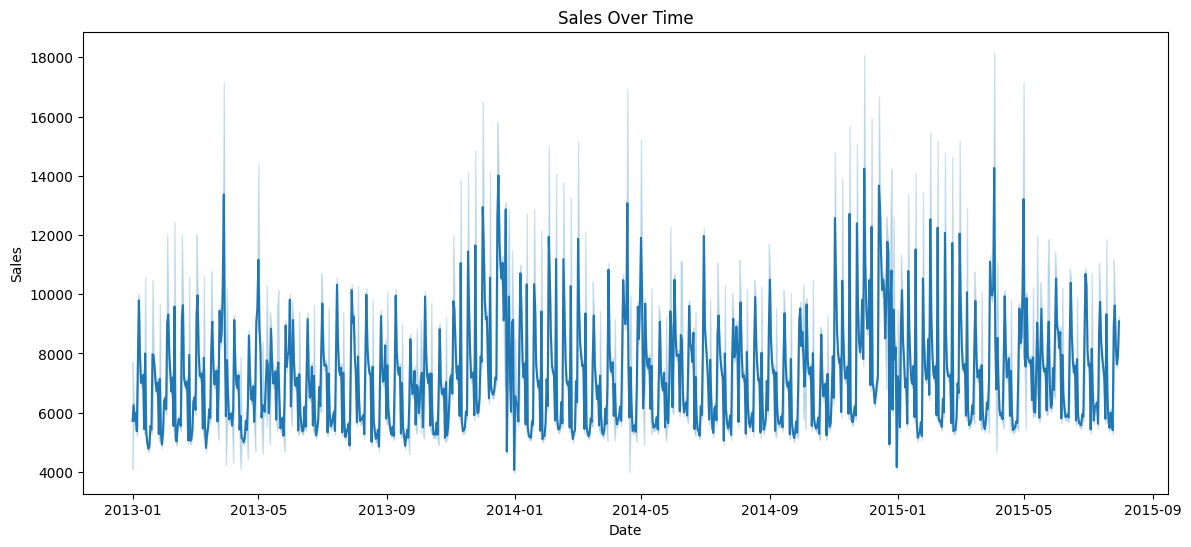

In [14]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Sales', data=data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


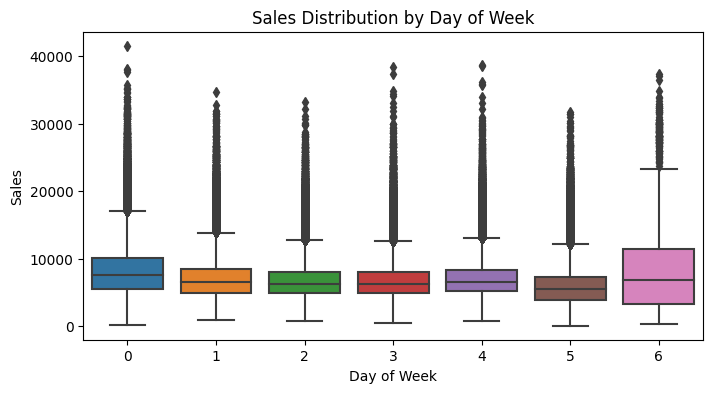

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='DayOfWeek', y='Sales', data=data)
plt.title('Sales Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()


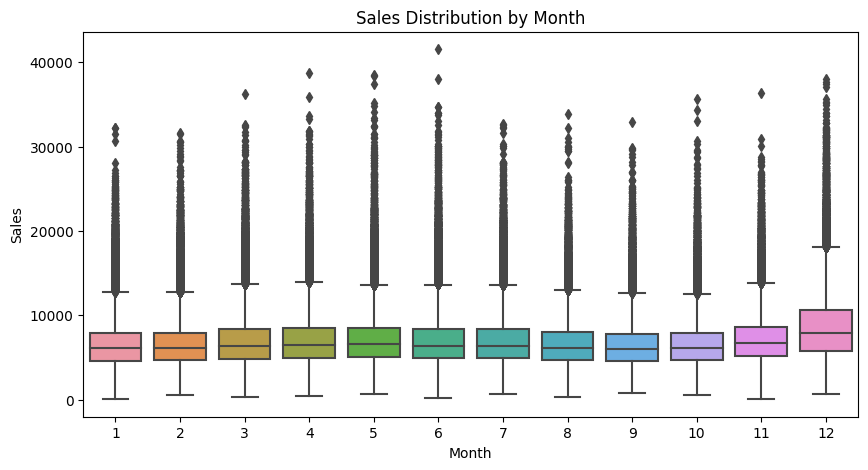

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Sales', data=data)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'WeekOfYear']
target = 'Sales'

X = data[features]
y = data[target]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestRegressor


In [13]:
# Check for missing values in the entire dataset
print(data.isnull().sum())

# Check for missing values specifically in X_train
print(X_train.isnull().sum())


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                 112120
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Year                              0
Month                             0
WeekOfYear                        0
dtype: int64
Store                0
DayOfWeek            0
Promo                0
StateHoliday     89900
SchoolHoliday        0
Year                 0
Month                0
WeekOfYear           0
dtype: int64


In [14]:
# Fill numerical columns with the mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Alternatively, fill with median or mode
# X_train.fillna(X_train.median(), inplace=True)
# X_test.fillna(X_test.median(), inplace=True)

# If categorical, fill with mode
for col in ['StateHoliday']:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)


In [15]:
X_train.fillna(method='ffill', inplace=True)
X_test.fillna(method='ffill', inplace=True)


In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
y_pred = model.predict(X_test)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


RMSE: 1612.69
R^2: 0.73


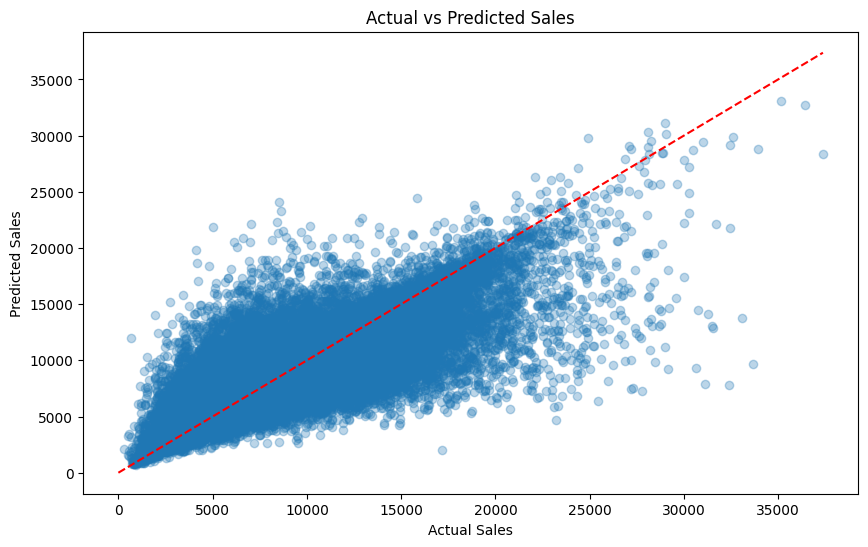

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()


In [21]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox


In [23]:
class SalesPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Weekly Sales Prediction")
        self.root.geometry("400x400")
        
        # Create input fields
        self.create_widgets()
        
    def create_widgets(self):
        # Store
        ttk.Label(self.root, text="Store:").grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)
        self.store_entry = ttk.Entry(self.root)
        self.store_entry.grid(row=0, column=1, padx=10, pady=10)
        
        # Day of Week
        ttk.Label(self.root, text="Day of Week:").grid(row=1, column=0, padx=10, pady=10, sticky=tk.W)
        self.day_entry = ttk.Entry(self.root)
        self.day_entry.grid(row=1, column=1, padx=10, pady=10)
        
        # Promo
        ttk.Label(self.root, text="Promo:").grid(row=2, column=0, padx=10, pady=10, sticky=tk.W)
        self.promo_entry = ttk.Entry(self.root)
        self.promo_entry.grid(row=2, column=1, padx=10, pady=10)
        
        # State Holiday
        ttk.Label(self.root, text="State Holiday:").grid(row=3, column=0, padx=10, pady=10, sticky=tk.W)
        self.holiday_entry = ttk.Entry(self.root)
        self.holiday_entry.grid(row=3, column=1, padx=10, pady=10)
        
        # School Holiday
        ttk.Label(self.root, text="School Holiday:").grid(row=4, column=0, padx=10, pady=10, sticky=tk.W)
        self.school_entry = ttk.Entry(self.root)
        self.school_entry.grid(row=4, column=1, padx=10, pady=10)
        
        # Year
        ttk.Label(self.root, text="Year:").grid(row=5, column=0, padx=10, pady=10, sticky=tk.W)
        self.year_entry = ttk.Entry(self.root)
        self.year_entry.grid(row=5, column=1, padx=10, pady=10)
        
        # Month
        ttk.Label(self.root, text="Month:").grid(row=6, column=0, padx=10, pady=10, sticky=tk.W)
        self.month_entry = ttk.Entry(self.root)
        self.month_entry.grid(row=6, column=1, padx=10, pady=10)
        
        # Week of Year
        ttk.Label(self.root, text="Week of Year:").grid(row=7, column=0, padx=10, pady=10, sticky=tk.W)
        self.week_entry = ttk.Entry(self.root)
        self.week_entry.grid(row=7, column=1, padx=10, pady=10)
        
        # Predict Button
        predict_button = ttk.Button(self.root, text="Predict", command=self.predict_sales)
        predict_button.grid(row=8, column=0, columnspan=2, pady=20)
        
    def predict_sales(self):
        # Gather inputs
        store = int(self.store_entry.get())
        day = int(self.day_entry.get())
        promo = int(self.promo_entry.get())
        holiday = int(self.holiday_entry.get())
        school = int(self.school_entry.get())
        year = int(self.year_entry.get())
        month = int(self.month_entry.get())
        week = int(self.week_entry.get())
        
        # Prepare input data
        input_data = np.array([[store, day, promo, holiday, school, year, month, week]])
        
        # Load the model (ensure the model is trained and saved as 'sales_model.pkl')
        import joblib
        model = joblib.load('sales_model.pkl')
        
        # Make prediction
        prediction = model.predict(input_data)
        
        # Display prediction
        messagebox.showinfo("Prediction", f"Predicted Weekly Sales: {prediction[0]:.2f}")

# Initialize the application
if __name__ == "__main__":
    root = tk.Tk()
    app = SalesPredictionApp(root)
    root.mainloop()


In [22]:
import joblib

# Save the model
joblib.dump(model, 'sales_model.pkl')


['sales_model.pkl']